In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Replace 'your_file.tsv' with the actual path or URL to your TSV file
file_path = 'chipotle.tsv'
df = pd.read_csv(file_path, sep='\t')

In [7]:
# Display the number of missing values in each column
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Handling Missing Values:
# Here are some common strategies for handling missing values:

# 1. Drop rows with missing values:
df_cleaned = df.dropna()

# 2. Fill missing values with a specific value (e.g., 0):
df_filled = df.fillna(0)

# 3. Fill missing values with the mean, median, or mode of the column:
df_mean_filled = df.fillna(df.mean())
df_median_filled = df.fillna(df.median())
df_mode_filled = df.fillna(df.mode().iloc[0])  # Use the first mode if multiple modes exist

# Choose the appropriate strategy based on your specific case and data characteristics.

# Display the first few rows of the cleaned DataFrame
df_cleaned.head()


Missing Values in Each Column:
order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64


<ipython-input-7-f6c9eed69978>:16: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_mean_filled = df.fillna(df.mean())
<ipython-input-7-f6c9eed69978>:17: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_median_filled = df.fillna(df.median())


,order_id,quantity,item_name,choice_description,item_price
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75


In [9]:
# Display the data types of each column
data_types = df.dtypes
print("Data Types of Each Column:")
print(data_types)

# Check if the data types align with expectations and make adjustments if necessary

# For example, if 'Quantity' or 'Item Price' are not numeric, you might need to convert them
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')  # 'coerce' will replace non-numeric values with NaN

# If 'Item Price' is a string representing currency, you might want to convert it to a numeric format
df['item_price'] = df['item_price'].str.replace('$', '').astype(float)

# Verify the changes
print("\nAdjusted Data Types:")
print(df.dtypes)

# Display the first few rows of the DataFrame with adjusted data types
df.head()


Data Types of Each Column:
order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

Adjusted Data Types:
order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object


<ipython-input-9-cb6f2d1bdc54>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['item_price'] = df['item_price'].str.replace('$', '').astype(float)


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [10]:
# Identify duplicated entries
duplicates = df[df.duplicated()]

# Display duplicated entries, if any
print("Duplicated Entries:")
print(duplicates)

# Handle duplicates based on your analysis needs:

# 1. Drop duplicates:
df_no_duplicates = df.drop_duplicates()

# 2. Keep the first occurrence and remove subsequent duplicates:
df_first_occurrence = df.drop_duplicates(keep='first')

# 3. Keep the last occurrence and remove previous duplicates:
df_last_occurrence = df.drop_duplicates(keep='last')

# 4. Keep none and remove all duplicates:
df_no_duplicates_any = df.drop_duplicates(keep=False)

# Choose the appropriate strategy based on your analysis requirements.

# Verify the changes
print("\nDataFrame without Duplicates:")
print(df_no_duplicates.head())


Duplicated Entries:
      order_id  quantity                            item_name  \
238        103         1                        Steak Burrito   
248        108         1                          Canned Soda   
297        129         1                        Steak Burrito   
381        165         1                    Canned Soft Drink   
484        205         1                         Chicken Bowl   
567        233         1                    Canned Soft Drink   
617        254         1                                Chips   
684        282         1                    Canned Soft Drink   
773        319         1                         Chicken Bowl   
908        376         1                        Steak Burrito   
924        381         1                   Chicken Soft Tacos   
1003       412         1                        Bottled Water   
1117       462         1                      Chicken Burrito   
1203       491         1                      Chicken Burrito   
1245 

In [11]:
# Display summary statistics for 'Quantity' and 'Item Price'
summary_statistics = df[['quantity', 'item_price']].describe()
print("Summary Statistics:")
print(summary_statistics)

# Check for anomalies or inconsistencies

# Example: Check for negative quantities
negative_quantities = df[df['quantity'] < 0]
print("\nRows with Negative Quantities:")
print(negative_quantities)

# Example: Check for negative or zero item prices
negative_or_zero_prices = df[df['item_price'] <= 0]
print("\nRows with Negative or Zero Item Prices:")
print(negative_or_zero_prices)

# Example: Check for unusually high prices
unusual_prices = df[df['item_price'] > 1000]  # Adjust the threshold based on your data
print("\nRows with Unusually High Item Prices:")
print(unusual_prices)

# Address any identified anomalies or inconsistencies based on your analysis

# Example: Remove rows with negative quantities
df = df[df['quantity'] >= 0]

# Example: Remove rows with negative or zero item prices
df = df[df['item_price'] > 0]

# Example: Address unusually high prices (e.g., consider updating or removing these rows)
# ...

# Verify the changes
print("\nDataFrame after Corrections:")
print(df.head())


Summary Statistics:
          quantity   item_price
count  4622.000000  4622.000000
mean      1.075725     7.464336
std       0.410186     4.245557
min       1.000000     1.090000
25%       1.000000     3.390000
50%       1.000000     8.750000
75%       1.000000     9.250000
max      15.000000    44.250000

Rows with Negative Quantities:
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price]
Index: []

Rows with Negative or Zero Item Prices:
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price]
Index: []

Rows with Unusually High Item Prices:
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price]
Index: []

DataFrame after Corrections:
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar 

In [13]:
df['choice_description'] = df['choice_description'].astype(str)

In [14]:
# Display unique values in the 'Choice Description' column
unique_choices = df['choice_description'].unique()
print("Unique Choices:")
print(unique_choices)

# Check for rows with multiple descriptions for a single item
multiple_descriptions = df[df.duplicated(subset=['order_id', 'item_name'], keep=False)]
print("\nRows with Multiple Descriptions for a Single Item:")
print(multiple_descriptions[['order_id', 'item_name', 'choice_description']])

# Choose an appropriate approach based on your analysis needs:

# Example: Keep only the first description for each item
df_first_description = df.drop_duplicates(subset=['order_id', 'item_name'], keep='first')

# Example: Concatenate multiple descriptions for each item into a single string
df_concatenated_descriptions = df.groupby(['order_id', 'item_name'])['choice_description'].apply(', '.join).reset_index()

# Example: Analyze the impact of multiple descriptions and decide on a case-by-case basis
# ...

# Verify the changes
print("\nDataFrame with Single Description per Item:")
print(df_first_description.head())

print("\nDataFrame with Concatenated Descriptions per Item:")
print(df_concatenated_descriptions.head())


Unique Choices:
['nan' '[Clementine]' '[Apple]' ...
 '[Roasted Chili Corn Salsa, [Pinto Beans, Sour Cream, Cheese, Lettuce, Guacamole]]'
 '[Tomatillo Green Chili Salsa, [Rice, Black Beans]]'
 '[Tomatillo Green Chili Salsa, [Rice, Fajita Vegetables, Black Beans, Guacamole]]']

Rows with Multiple Descriptions for a Single Item:
      order_id           item_name  \
35          18  Chicken Soft Tacos   
36          18  Chicken Soft Tacos   
76          34        Chicken Bowl   
78          34        Chicken Bowl   
90          40          Steak Bowl   
...        ...                 ...   
4617      1833       Steak Burrito   
4618      1833       Steak Burrito   
4619      1834  Chicken Salad Bowl   
4620      1834  Chicken Salad Bowl   
4621      1834  Chicken Salad Bowl   

                                     choice_description  
35                     [Roasted Chili Corn Salsa, Rice]  
36        [Roasted Chili Corn Salsa, [Cheese, Lettuce]]  
76    [Fresh Tomato Salsa, [Rice, Black B

In [15]:
# Specify the columns to check for special characters
text_columns = ['item_name', 'choice_description']

# Check for special characters in each specified column
for column in text_columns:
    special_characters = df[column].apply(lambda x: any(char.isalnum() or char.isspace() for char in x))
    rows_with_special_characters = df[~special_characters]

    print(f"\nRows with Special Characters in '{column}':")
    print(rows_with_special_characters[[column]])

# Cleanse special characters based on your analysis needs

# Example: Remove non-alphanumeric characters and spaces
df['item_name'] = df['item_name'].apply(lambda x: ''.join(char for char in x if char.isalnum() or char.isspace()))
df['choice_description'] = df['choice_description'].apply(lambda x: ''.join(char for char in x if char.isalnum() or char.isspace()))

# Verify the changes
print("\nDataFrame after Special Character Cleansing:")
print(df.head())



Rows with Special Characters in 'item_name':
Empty DataFrame
Columns: [item_name]
Index: []

Rows with Special Characters in 'choice_description':
Empty DataFrame
Columns: [choice_description]
Index: []

DataFrame after Special Character Cleansing:
   order_id  quantity                             item_name  \
0         1         1          Chips and Fresh Tomato Salsa   
1         1         1                                  Izze   
2         1         1                      Nantucket Nectar   
3         1         1  Chips and TomatilloGreen Chili Salsa   
4         2         2                          Chicken Bowl   

                                  choice_description  item_price  
0                                                nan        2.39  
1                                         Clementine        3.39  
2                                              Apple        3.39  
3                                                nan        2.39  
4  TomatilloRed Chili Salsa Hot Blac

In [16]:
# Display unique values in the 'Order ID' column
unique_order_ids = df['order_id'].unique()
print("Unique Order IDs:")
print(unique_order_ids)

# Check for irregularities or patterns in the 'Order ID' column
# Examples:
# - Check for duplicate Order IDs
duplicate_order_ids = df[df.duplicated(subset=['order_id'], keep=False)]
print("\nRows with Duplicate Order IDs:")
print(duplicate_order_ids[['order_id', 'item_name']])

# - Check for missing or null Order IDs
missing_order_ids = df[df['order_id'].isnull()]
print("\nRows with Missing or Null Order IDs:")
print(missing_order_ids[['order_id', 'item_name']])

# - Check for patterns or anomalies in Order IDs (e.g., incorrect formats)
# ...

# Address any identified irregularities based on your analysis needs

# Example: Remove rows with missing or null Order IDs
df = df.dropna(subset=['order_id'])

# Verify the changes
print("\nDataFrame after Handling Order ID Irregularities:")
print(df.head())


Unique Order IDs:
[   1    2    3 ... 1832 1833 1834]

Rows with Duplicate Order IDs:
      order_id                             item_name
0            1          Chips and Fresh Tomato Salsa
1            1                                  Izze
2            1                      Nantucket Nectar
3            1  Chips and TomatilloGreen Chili Salsa
5            3                          Chicken Bowl
...        ...                                   ...
4617      1833                         Steak Burrito
4618      1833                         Steak Burrito
4619      1834                    Chicken Salad Bowl
4620      1834                    Chicken Salad Bowl
4621      1834                    Chicken Salad Bowl

[4494 rows x 2 columns]

Rows with Missing or Null Order IDs:
Empty DataFrame
Columns: [order_id, item_name]
Index: []

DataFrame after Handling Order ID Irregularities:
   order_id  quantity                             item_name  \
0         1         1          Chips and Fre

In [17]:
# Display unique values in the 'Item Name' column
unique_item_names = df['item_name'].unique()
print("Unique Item Names:")
print(unique_item_names)

# Standardize the 'Item Name' column

# Example: Convert to lowercase
df['item_name'] = df['item_name'].str.lower()

# Example: Remove extra spaces
df['item_name'] = df['item_name'].str.strip()

# Example: Replace specific variations with a standardized term
df['item_name'] = df['item_name'].replace({'variation1': 'standardized_term1', 'variation2': 'standardized_term2'})

# Verify the changes
print("\nDataFrame after Item Name Standardization:")
print(df.head())


Unique Item Names:
['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and TomatilloGreen Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos' 'Chicken Soft Tacos' 'Chicken Burrito'
 'Canned Soda' 'Barbacoa Burrito' 'Carnitas Burrito' 'Carnitas Bowl'
 'Bottled Water' 'Chips and Tomatillo Green Chili Salsa' 'Barbacoa Bowl'
 'Chips' 'Chicken Salad Bowl' 'Steak Bowl' 'Barbacoa Soft Tacos'
 'Veggie Burrito' 'Veggie Bowl' 'Steak Crispy Tacos'
 'Chips and Tomatillo Red Chili Salsa' 'Barbacoa Crispy Tacos'
 'Veggie Salad Bowl' 'Chips and Roasted ChiliCorn Salsa'
 'Chips and Roasted Chili Corn Salsa' 'Carnitas Soft Tacos'
 'Chicken Salad' 'Canned Soft Drink' 'Steak Salad Bowl'
 '6 Pack Soft Drink' 'Chips and TomatilloRed Chili Salsa' 'Bowl' 'Burrito'
 'Crispy Tacos' 'Carnitas Crispy Tacos' 'Steak Salad'
 'Chips and Mild Fresh Tomato Salsa' 'Veggie Soft Tacos'
 'Carnitas Salad Bowl' 'Barbacoa Salad Bowl' 'Sal


Rows with Negative Quantities:
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price]
Index: []

Rows with Negative or Zero Item Prices:
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price]
Index: []

Rows with Unusually High Item Prices:
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price]
Index: []


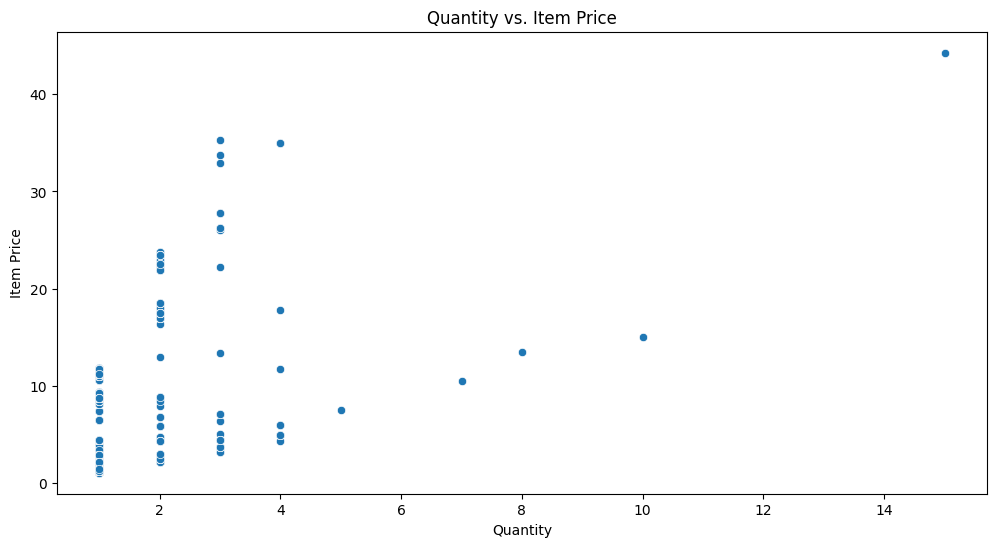

In [20]:
import seaborn as sns
negative_quantities = df[df['quantity'] < 0]
print("\nRows with Negative Quantities:")
print(negative_quantities)

# Example: Check for negative or zero item prices
negative_or_zero_prices = df[df['item_price'] <= 0]
print("\nRows with Negative or Zero Item Prices:")
print(negative_or_zero_prices)

# Example: Check for unusually high prices
unusual_prices = df[df['item_price'] > 1000]  # Adjust the threshold based on your data
print("\nRows with Unusually High Item Prices:")
print(unusual_prices)

# Visualize the relationships using scatter plots or other relevant plots
plt.figure(figsize=(12, 6))

# Scatter plot of Quantity vs. Item Price
sns.scatterplot(x='quantity', y='item_price', data=df)
plt.title('Quantity vs. Item Price')
plt.xlabel('Quantity')
plt.ylabel('Item Price')
plt.show()

In [22]:
negative_quantities = df[df['quantity'] < 0]
print("\nRows with Negative Quantities:")
print(negative_quantities[['item_name', 'choice_description', 'quantity']])

# Example: Check for negative or zero item prices
negative_or_zero_prices = df[df['item_price'] <= 0]
print("\nRows with Negative or Zero Item Prices:")
print(negative_or_zero_prices[['item_name', 'choice_description', 'item_price']])

# Example: Check for inconsistencies in descriptions and prices for the same item
inconsistent_descriptions_prices = df[df.duplicated(subset=['item_name', 'choice_description'], keep=False)]
print("\nRows with Inconsistent Descriptions and Prices for the Same Item:")
print(inconsistent_descriptions_prices[['item_name', 'choice_description', 'item_price']])

# Add more checks based on your specific data and analysis needs

# Address any identified issues based on your analysis needs

# Example: Remove rows with negative quantities
df = df[df['quantity'] >= 0]

# Example: Remove rows with negative or zero item prices
df = df[df['item_price'] > 0]

# Example: Address inconsistencies by keeping the first occurrence
df = df.drop_duplicates(subset=['item_name', 'choice_description'], keep='first')

# Verify the changes
print("\nDataFrame after Data Integrity Checks:")
print(df.head())



Rows with Negative Quantities:
Empty DataFrame
Columns: [item_name, choice_description, quantity]
Index: []

Rows with Negative or Zero Item Prices:
Empty DataFrame
Columns: [item_name, choice_description, item_price]
Index: []

Rows with Inconsistent Descriptions and Prices for the Same Item:
                                 item_name  \
0             chips and fresh tomato salsa   
1                                     izze   
2                         nantucket nectar   
3     chips and tomatillogreen chili salsa   
5                             chicken bowl   
...                                    ...   
4617                         steak burrito   
4618                         steak burrito   
4619                    chicken salad bowl   
4620                    chicken salad bowl   
4621                    chicken salad bowl   

                                     choice_description  item_price  
0                                                   nan        2.39  
1          

In [23]:
# Display unique values in the categorical column (e.g., 'Item Name')
unique_item_names = df['item_name'].unique()
print("Unique Item Names:")
print(unique_item_names)

# Perform one-hot encoding for the categorical column
df_encoded = pd.get_dummies(df, columns=['item_name'], prefix='item')

# Verify the changes
print("\nDataFrame after One-Hot Encoding:")
print(df_encoded.head())


Unique Item Names:
['chips and fresh tomato salsa' 'izze' 'nantucket nectar'
 'chips and tomatillogreen chili salsa' 'chicken bowl' 'side of chips'
 'steak burrito' 'steak soft tacos' 'chips and guacamole'
 'chicken crispy tacos' 'chicken soft tacos' 'chicken burrito'
 'canned soda' 'barbacoa burrito' 'carnitas burrito' 'carnitas bowl'
 'bottled water' 'chips and tomatillo green chili salsa' 'barbacoa bowl'
 'chips' 'chicken salad bowl' 'steak bowl' 'barbacoa soft tacos'
 'veggie burrito' 'veggie bowl' 'steak crispy tacos'
 'chips and tomatillo red chili salsa' 'barbacoa crispy tacos'
 'veggie salad bowl' 'chips and roasted chilicorn salsa'
 'chips and roasted chili corn salsa' 'carnitas soft tacos'
 'chicken salad' 'canned soft drink' 'steak salad bowl'
 '6 pack soft drink' 'chips and tomatillored chili salsa' 'bowl' 'burrito'
 'crispy tacos' 'carnitas crispy tacos' 'steak salad'
 'chips and mild fresh tomato salsa' 'veggie soft tacos'
 'carnitas salad bowl' 'barbacoa salad bowl' 'sal

In [24]:
# Display unique values in the 'Quantity' column
unique_quantities = df['quantity'].unique()
print("Unique Quantities:")
print(unique_quantities)

# Display unique values in the 'Item Price' column
unique_prices = df['item_price'].unique()
print("\nUnique Item Prices:")
print(unique_prices)

# Perform unit conversions or adjustments if necessary

# Example: Convert 'Quantity' to a consistent unit (e.g., convert to pieces if currently in dozens)
df['quantity'] = df['quantity'].apply(lambda x: x * 12 if 'dozen' in str(x).lower() else x)

# Example: Convert 'Item Price' to a consistent currency (e.g., convert to USD if currently in another currency)
df['item_price'] = df['item_price'].apply(lambda x: x * 1.2 if 'euro' in str(x).lower() else x)

# Verify the changes
print("\nDataFrame after Unit Conversions or Adjustments:")
print(df.head())


Unique Quantities:
[1 2 3 4]

Unique Item Prices:
[ 2.39  3.39 16.98 10.98  1.69 11.75  9.25  4.45  8.75 11.25  8.49  2.18
  8.99  1.09  2.95  2.15 22.5  11.48 17.98 17.5   1.25 23.78  6.49 11.08
 32.94 22.2  10.58 23.5   7.4  18.5  11.89  9.39  3.    8.69  8.19 35.
 27.75 21.96 22.96 26.07 16.38  8.5  11.49]

DataFrame after Unit Conversions or Adjustments:
   order_id  quantity                             item_name  \
0         1         1          chips and fresh tomato salsa   
1         1         1                                  izze   
2         1         1                      nantucket nectar   
3         1         1  chips and tomatillogreen chili salsa   
4         2         2                          chicken bowl   

                                  choice_description  item_price  
0                                                nan        2.39  
1                                         Clementine        3.39  
2                                              Apple       